# __Yonatan Adam's Project About Movies__

## __Research Question:__
Is there a relationship between the genre of the film, the target audience, the length of the film, and the success of Hollywood films?


_The dataset was taken from [Kaggle Movies Dataset](https://www.kaggle.com/datasets/danielgrijalvas/movies)._

---


# __Work Planning__

## 1. Data Preprocessing and Feature Engineering:
- Handle missing values.
- Convert data types as necessary.
- Sort and filter the data.

## 2. Additional Feature Engineering:
- Create new attributes: `country_id`, `rating_id`, `genre_id`, and `success` based on the processed and balanced dataset.

## 3. Train-Test Split:
- Split the balanced dataset into training and test sets using `train_test_split`.

## 4. Training and Evaluation of Classifiers:
- Iterate over a range of k values for the K-Nearest Neighbors `(KNN)` classifier.
- Train the KNN classifier on the training set for each k value.
- Evaluate the classifier's performance by calculating accuracy scores, confusion matrices, and classification reports for each k value.

## 5. Selecting the Best k Value:
- Determine the best k value based on the highest accuracy score.

## 6. Printing Evaluation Results:
- Print the best k value, along with its corresponding accuracy score, confusion matrix, and classification report.

#### Import the Needed Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

Import the dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/data/movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


checking for duplicates

In [ ]:
df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


percentage of missing data

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,(pct_missing*100)))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [ ]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Convert missing data to 0 or NaN

In [ ]:
df['budget'] = df['budget'].replace(np.nan, 0)
df['gross'] = df['gross'].replace(np.nan, 0)
df['runtime'] = df['runtime'].replace(np.nan, 0)
df['score'] = df['score'].replace(np.nan, 0)
df['votes'] = df['votes'].replace(np.nan, 0)
df['rating'] = df['rating'].replace(np.nan, 'Unknown')
df['released'] = df['released'].replace(np.nan, 'Unknown')
df['writer'] = df['writer'].replace(np.nan, 'Unknown')
df['star'] = df['star'].replace(np.nan, 'Unknown')
df['country'] = df['country'].replace(np.nan, 'Unknown')
df['company'] = df['company'].replace(np.nan, 'Unknown')

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,(pct_missing*100)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


remove missing data

In [ ]:
df.dropna(inplace = True)

Converts the data to "int" type for convenience

In [ ]:
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

Define movies whose profit and budget are equal to 0 for their average

In [ ]:
budget_avg = df[df['budget'] != 0]['budget'].mean()
gross_avg = df[df['gross'] != 0]['gross'].mean()

df['budget'] = df['budget'].replace(0, budget_avg)
df['gross'] = df['gross'].replace(0, gross_avg)

A list of target audiences and their quantity

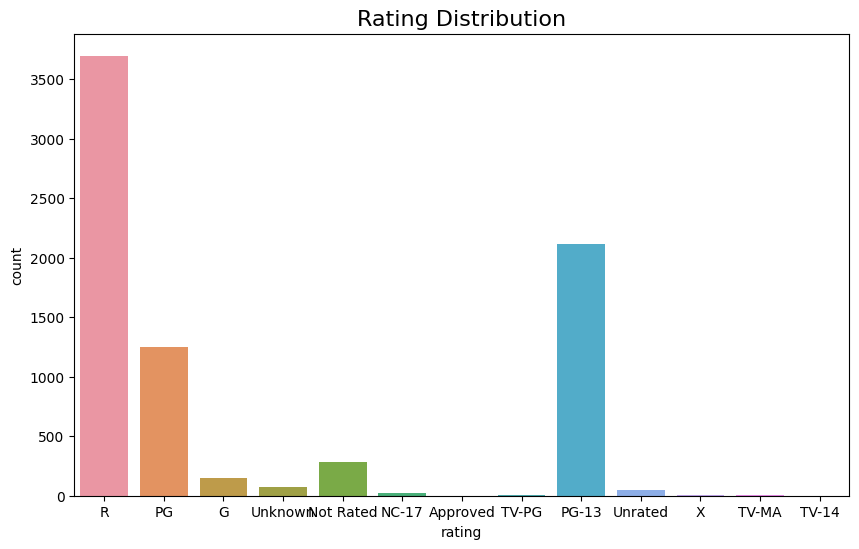

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating')
plt.title('Rating Distribution', fontsize=16)
plt.show()

A preliminary correlation table will help me decide which data are related

<ipython-input-121-94517ce415c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, cmap="Greens")


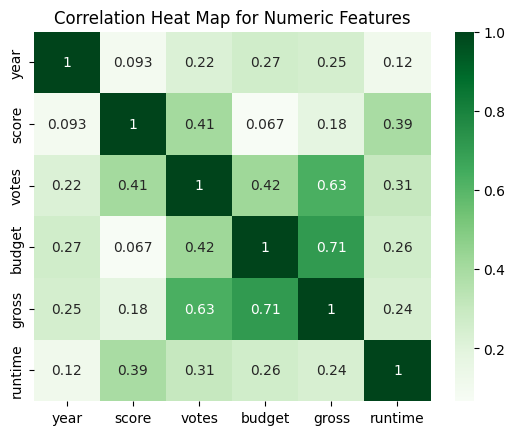

In [ ]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="Greens")
plt.title('Correlation Heat Map for Numeric Features')
plt.show()

<Figure size 1000x3000 with 0 Axes>

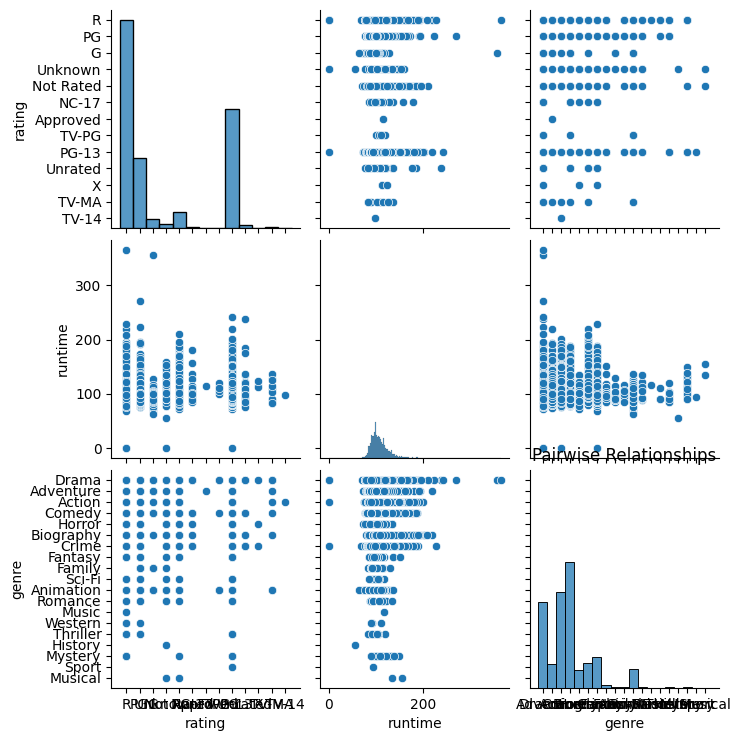

In [ ]:
plt.figure(figsize=(10, 30))
sns.pairplot(data=df, vars=['rating', 'runtime', 'genre'])
plt.title('Pairwise Relationships')
plt.show()

## Data cleanup

In this part I check how many of each type of data I want to use and if there is a type that has little of it I delete them
And then I convert the data from literal data to numerical data

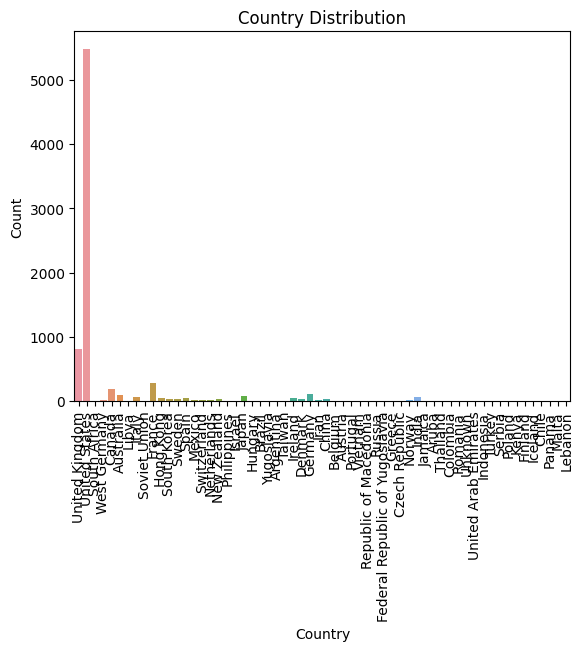

In [ ]:
sns.countplot(data=df, x='country')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

I will refer only to films from the United States

In [ ]:
df['country'].info

<bound method Series.info of 0       United Kingdom
1        United States
2        United States
3        United States
4        United States
             ...      
7663     United States
7664     United States
7665     United States
7666     United States
7667      South Africa
Name: country, Length: 7668, dtype: object>

In [ ]:
df = df[df['country'] == 'United States']

In [ ]:
#df = df[df['genre'] == 'Comedy']  // PART OF A TEST

In [ ]:
df = df[df['rating'].map(df['rating'].value_counts()) >= 100]

In [ ]:
rating_ids, rating_labels = pd.factorize(df['rating'])
df['rating_id'] = rating_ids

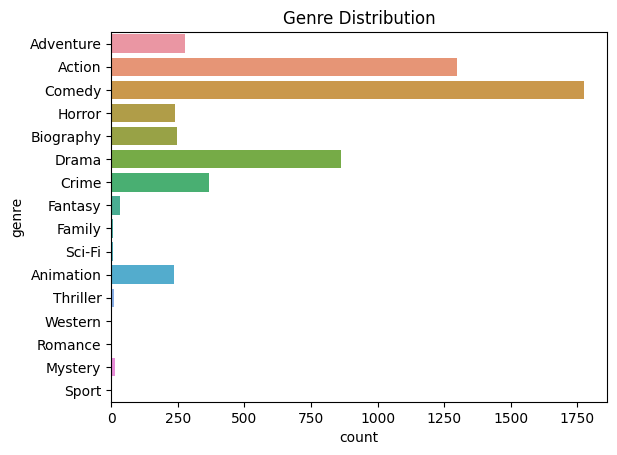

In [ ]:
sns.countplot(data=df, y='genre')
plt.title('Genre Distribution')
plt.show()

In [ ]:
#df = df[df['genre'].map(df['genre'].value_counts()) >= 10] // PART OF A TEST

In [ ]:
genre_ids, genre_labels = pd.factorize(df['genre'])
df['genre_id'] = genre_ids

In [ ]:
df['runtime_ranges'] = pd.qcut(df['runtime'], q=3, labels=False)

here is create the 'y' column which are the successful films

 A successful film is a film whose profit is 3 times greater than the budget

In [ ]:
df['success'] = (df['gross'] >= 3 * df['budget']).astype(int)

In [ ]:
success_counts = df['success'].value_counts() # PART OF A TEST
print(success_counts)

0    3893
1    1481
Name: success, dtype: int64


In [ ]:
df = df.drop(df[df['success'] == 0].sample(n=2412, random_state=42).index) # PART OF THE TEST

In [ ]:
success_counts2 = df['success'].value_counts() # PART OF THE TEST
print(success_counts2)

1    1481
0    1481
Name: success, dtype: int64


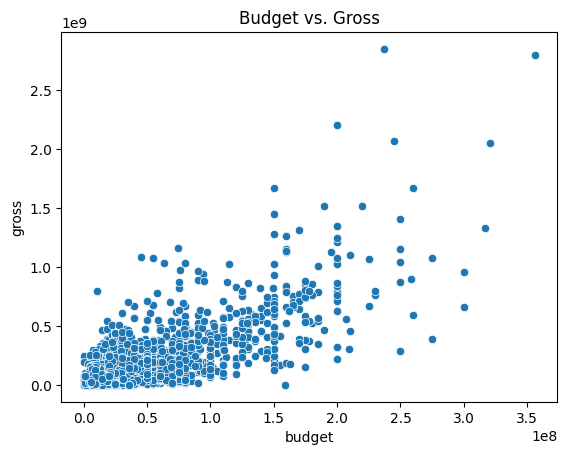

In [ ]:
sns.scatterplot(data=df, x='budget', y='gross')
plt.title('Budget vs. Gross')
plt.show()

An examination of how many films are successful and how many are not

I need to balance the data

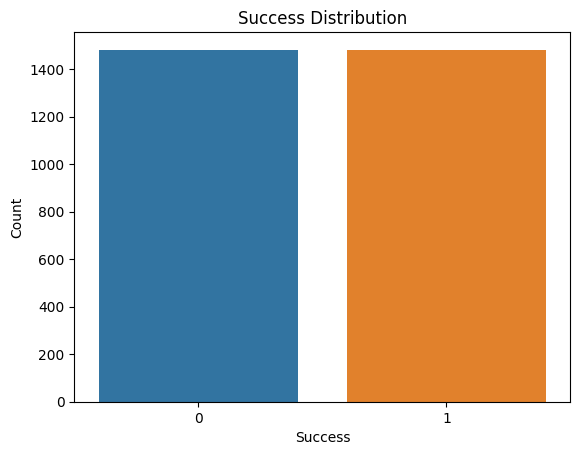

In [ ]:
counts = df['success'].value_counts()

sns.countplot(data=df, x='success')
plt.title('Success Distribution')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

In this part I perform a function of balancing the data and setting X and Y
Training and experience and testing of the best K values. And finally printing the success data and the confusion matrix

In [ ]:
X = df[['rating_id','runtime_ranges','genre_id']]
y = df['success']

In [ ]:
X

,rating_id,runtime_ranges,genre_id
1,0,1,0
2,1,2,1
3,1,0,2
4,0,1,2
5,0,0,3
...,...,...,...
7648,0,2,1
7649,1,1,1
7656,3,2,2
7658,0,0,5


In [ ]:
y

1       1
2       1
3       1
4       1
5       1
       ..
7648    1
7649    1
7656    0
7658    1
7661    1
Name: success, Length: 2962, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k_values = range(3, 50)

accuracy_scores = []
confusion_matrices = []
classification_reports = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    report = classification_report(y_test, y_pred, zero_division=1)
    classification_reports.append(report)

Best k value: 46


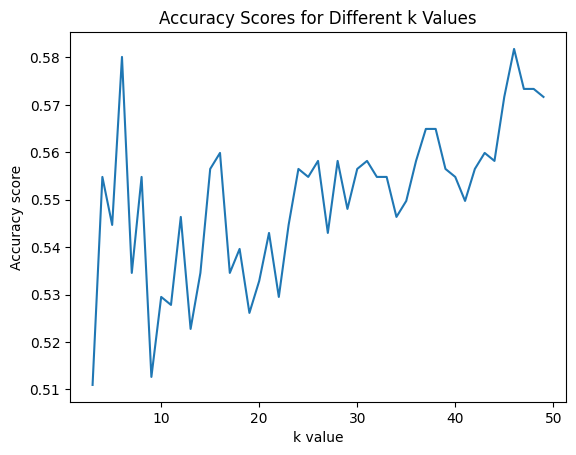

In [ ]:
best_k = k_values[np.argmax(accuracy_scores)]

print("Best k value:", best_k)
plt.plot(k_values, accuracy_scores)
plt.xlabel("k value")
plt.ylabel("Accuracy score")
plt.title("Accuracy Scores for Different k Values")
plt.show()

In [ ]:
print("Accuracy score:", accuracy_scores[best_k - 1])
print("Confusion matrix:\n", confusion_matrices[best_k - 1])
print("Classification report:\n", classification_reports[best_k - 1])

Accuracy score: 0.5733558178752108
Confusion matrix:
 [[203 108]
 [145 137]]
Classification report:
               precision    recall  f1-score   support

           0       0.58      0.65      0.62       311
           1       0.56      0.49      0.52       282

    accuracy                           0.57       593
   macro avg       0.57      0.57      0.57       593
weighted avg       0.57      0.57      0.57       593



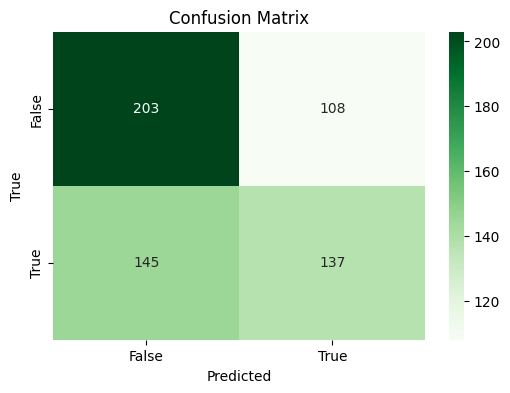

In [ ]:
cm = confusion_matrices[best_k - 1]
labels = ['False', 'True']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()